In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

iris = datasets.load_iris()
print('아이리스 종류 :', iris.target_names)
print('target : [0:setosa, 1:versicolor, 2:virginica]')
print('데어터 수 :', len(iris.data))
print('데이터 열 이름 :', iris.feature_names)

아이리스 종류 : ['setosa' 'versicolor' 'virginica']
target : [0:setosa, 1:versicolor, 2:virginica]
데어터 수 : 150
데이터 열 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
data = pd.DataFrame( {
    'sepal length': iris.data[:, 0], 
    'sepal width': iris.data[:, 1], 
    'petal length': iris.data[:, 2], 
    'petal width': iris.data[:, 3], 
    'species': iris.target}
)

In [3]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
x = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     sepal length  sepal width  petal length  petal width
32            5.2          4.1           1.5          0.1
52            6.9          3.1           4.9          1.5
70            5.9          3.2           4.8          1.8
121           5.6          2.8           4.9          2.0
144           6.7          3.3           5.7          2.5
..            ...          ...           ...          ...
113           5.7          2.5           5.0          2.0
64            5.6          2.9           3.6          1.3
15            5.7          4.4           1.5          0.4
125           7.2          3.2           6.0          1.8
9             4.9          3.1           1.5          0.1

[105 rows x 4 columns]
     sepal length  sepal width  petal length  petal width
87            6.3          2.3           4.4          1.3
111           6.4          2.7           5.3          1.9
10            5.4          3.7           1.5          0.2
91            6.1          3.0           4.6    

In [12]:
forest = RandomForestClassifier(n_estimators=100) 
forest

RandomForestClassifier()

In [13]:
forest.fit(x_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))

[1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1]
[1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [16]:
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

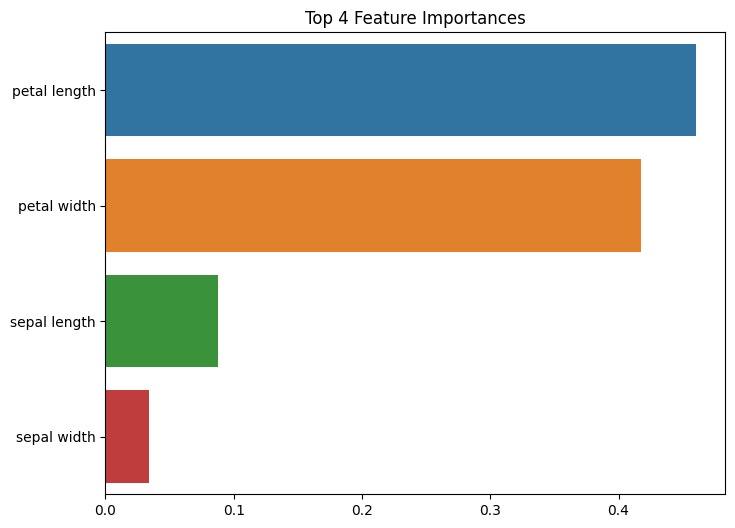

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_values = forest.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=x_train.columns)
feature_top4 = feature_importances.sort_values(ascending=False)[:4]

plt.figure(figsize=(8,6))
plt.title('Top 4 Feature Importances')
sns.barplot(x=feature_top4, y=feature_top4.index)
plt.show()

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [22]:
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [23]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

In [25]:
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [26]:
print("훈렦 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train))) 
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈렦 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [27]:
print("특성 중요도 : \n{}".format(forest.feature_importances_))


특성 중요도 : 
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


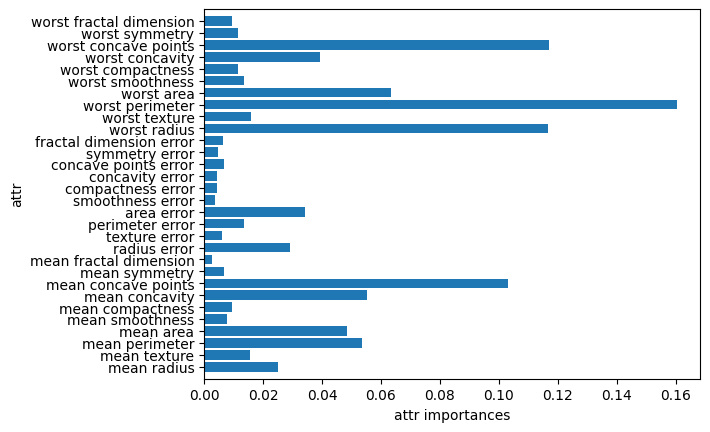

In [28]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("attr importances")
plt.ylabel("attr")
plt.ylim(-1, n_features)
plt.show()

In [30]:
feature_importances_values = forest.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=cancer.feature_names)
feature_top10 = feature_importances.sort_values(ascending=False)[:10]
feature_top10.values

array([0.16027724, 0.11711756, 0.11657269, 0.10305394, 0.0634688 ,
       0.05539489, 0.05372655, 0.04861645, 0.03923725, 0.03420174])

In [31]:
feature_top10.index

Index(['worst perimeter', 'worst concave points', 'worst radius',
       'mean concave points', 'worst area', 'mean concavity', 'mean perimeter',
       'mean area', 'worst concavity', 'area error'],
      dtype='object')

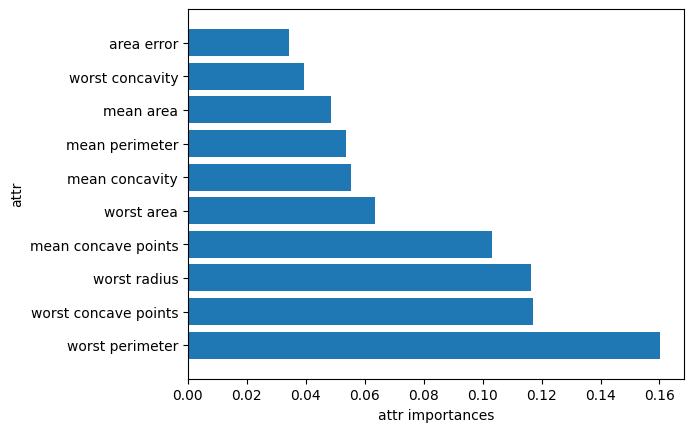

In [32]:
plt.barh(range(len(feature_top10.values)), feature_top10.values, align='center') 
plt.yticks(range(len(feature_top10.values)), feature_top10.index)
plt.xlabel("attr importances")
plt.ylabel("attr")
plt.ylim(-1, len(feature_top10.values))
plt.show()

In [33]:
df=pd.read_csv('mushroom.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [34]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [52]:
df["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [38]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [39]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [40]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [42]:
x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [54]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in range(len(x.columns)):
    idx=x.columns[i]
    data=le.fit_transform(x[idx])
    x[idx]=data
x

/Users/choejm/AI02/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [45]:
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [46]:
print("훈렦 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train))) 
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈렦 세트 정확도 : 1.000
테스트 세트 정확도 : 1.000


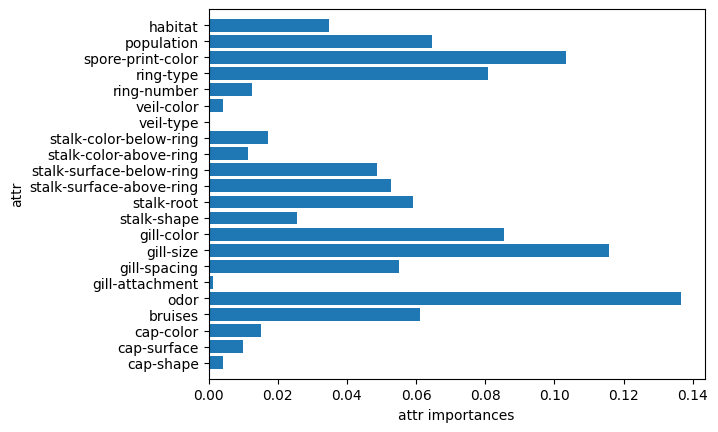

In [49]:
n_features = x.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), x.columns)
plt.xlabel("attr importances")
plt.ylabel("attr")
plt.ylim(-1, n_features)
plt.show()